Con uso de la libreria de `pandas`, importamos la base de datos `A1.2 Felicidad y GDP` para continar con nuestro analisis. A continuacion se muestran los 10 primeros paises con indices de felicidad mas grandes. 

In [32]:
import pandas as pd
data = pd.read_csv("A1.2 Felicidad y GDP.csv")
data.sort_values(by = "Felicidad", ascending = True)
data.head()

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


Despues, con ayuda de `numpy` asignamos valores a nuestra X y Y, donde X es el logaritmo base diez del `Gross Domestic Product (GDP)` y nuestra Y es la `Felicidad`. Ña razon por la que nuestro GDP esta expresado en logaritmo base 10, es por que al trabajar con datos tan grandes, es mas comun encontrar asociaciones con el propio logaritmos que con la variable pura.

In [36]:
import numpy as np
x = np.log10(data.GDP)
y = data.Felicidad

Ahora para caluclar los valores optimos de los coeficientes del modelo de regresion lineal simple.E mpezamos buscando `X barra`, que representa el promedio de todos los valores de X que tenemos, tambien a la `Y barra` que asi mismo, represneta el promedio de todos los valores pero para Y. Con estos datos calculados, se busca tener el valor de nuestra `B1 con gorro`, que representa la pendiente (la relacion que tiene nuestra variable Y con nuestra X, tambien se puede decir que es la `m` de la ecuacion `y = mx + b`) y `B0 con gorro` que representa el valor de Y cuando X es igual a cero.

In [34]:
xBar = np.mean(x)
yBar = np.mean(y)

B1num = sum((x-xBar)*(y-yBar))
B1den = sum((x-xBar)**2)

B1 = B1num / B1den
B0 = yBar - (B1 * xBar)

print("B1 =",B1)
print("B0 =",B0)

B1 = 0.6281284658810408
B0 = -1.3023500570747277


Ya con nuestros datos de B1 y B0, ahora podemos graficar esta regresion lineal simple y graficar la felicidad contra el logaritmo base 10 del GDP.

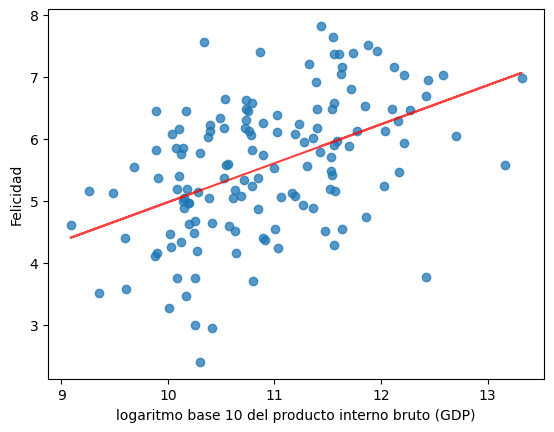

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

yHat = B0 + B1*x

plt.scatter(x, y, alpha = 0.75)
plt.plot(x, yHat, c = "r", alpha = 0.75)
plt.ylabel("Felicidad")
plt.xlabel("logaritmo base 10 del producto interno bruto (GDP)")
plt.show()


Ahora calculamos el `Residual Sum of Squares (RSS)`, que de manera sencilla, es para ver que tan cerca estan los puntos del modelo. Para esto calculamos la sumatoria del cuadriados de nuestros errores, que estos son la resta entre la posicion en Y del punto menos la del modelo.

In [56]:
RSS = sum((y - yHat)**2)
print("RSS =", RSS)

RSS = 131.3738317732635


Para saber que tan preciso es mi valor de B1 se calcula ahora el valor del `Standard Error (SE)`. Este es el error que asume que se repite el experimmento repetidas veces y asi ver que tanto puede variar. Posteriormente, para ver si la relacion entre la felicidad y el GDP es significativa calculamos el p valor con la funcion de `t.sf()` de `scipy.stats`. Esto para determinar cual de las hipotesis se acepta o rechaza. La hipotesis nula afirma cuando el valor de B1 = 0, en este caso, GDP no tiene efecto en la felicidad (no hay regresion lineal), caso contrario con la hipotesis alternativa que cuando B1 != 0, GDP si influye en la felicidad. En este caso, al tener un valor de `p` de 3.82×10^−9, un numero menor que 0.05, nos inclina a rechazar la hipotesis nula y podemos decir que GDP tiene un efecto estadísticamente significativo en la felicidad en nuestra población.

In [61]:
n =  len(x)
SEB1 = np.sqrt((RSS)/((n - 2) * sum((x - xBar)**2)))
print("SE =",SEB1)

# para determinar si es util o no

import scipy.stats as st

per = st.t.interval(confidence = 0.95, df = n-2)[1]

CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1

print("Intervalo: ",CIlow,CIhigh)

t = B1 / SEB1
p = st.t.sf(abs(t), n - 2)*2

print("t =",t)
print("p =",p)

SE = 0.09983378435340727
Intervalo:  0.4307393313073311 0.8255176004547504
t = 6.291742519320846
p = 3.825717831968765e-09


Para evaluar qué tan bien se ajusta nuestro modelo a los datos, se calcula el Residual Standard Error (RSE) y el 𝑅². El RSE nos indica el tamaño promedio del error de predicción que comete el modelo, es decir, qué tanto se desvían los valores reales de los valores estimados. Por otro lado, el 𝑅² mide la proporción de la variación de la variable dependiente que puede explicarse mediante la variable independiente. En este caso, al obtener un valor de 𝑅² = 0.22, significa que el modelo solo logra explicar aproximadamente el 22% de la variabilidad de los datos. Esto indica que nuestro modelo no se ajusta de manera adecuada a la relación entre las variables, por lo que no es un buen predictor en este escenario.

In [58]:
RSE = np.sqrt(RSS/(n-2))
print(RSE)

TSS = sum((y - yBar)**2)

R2 = 1 - (RSS / TSS)
print(R2)
# R2 representa la variabilidad entre que tanto puedo explicar mi output(Y), con mi input(X)
# Los valores de R2 representan este ajuste de mi modelo hacia los datos, entre mas cerca de 1, mas preciso es.
# Sin embargo, en este caso, al tener una R2 de 0.22 solo se pueden explicar el 22% de los datos.
# Lo que me lleva a la conclusion de que no es un modelo que se ajuste bien a los datos

0.9721807858537376
0.22166361654970657


Finalmente, al utilizar la función `OLS()` de la librería `statsmodels.api` , se pudo verificar que los resultados obtenidos manualmente coinciden con los que entrega la librería.

In [57]:
import statsmodels.api as sm

model = sm.OLS(y,sm.add_constant(x))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        10:59:39   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2